## A Taster to the Juxtorpus
<span style="font-size:16px;">

This notebook showcases some usages of the ATAP Juxtorpus tool, which includes two major components: **Corpus** and **Jux**. 
The **Corpus** package enables the user to upload, select and build their texts as a Corpus object. The Corpus can then be explored and sliced flexibly into sub-corpus based on various metadata or text patterns within the contents. Several out-of-box tools and visualisations come with the Corpus object so that the user can quickly explore the Corpus and sub-Corpus in a unified manner, and more functions will be developed for similar purposes.

The **Jux** package, on the other hand, is a simpler tool designed to compare and identify the contrasts between a pair of corpora. Although the comparison sounds like a simple task, when this is conducted on corpora refined with specific conditions and using different metrics of comparison, a lot of insights could be extracted from the analysis.

Besides the two new packages to the ATAP text analytic tool suite, this notebook will also demostrate how to integrate other ATAP tools together with the corpus in order to create a reuseable workflow for your research, these include _Concordance Tool_, _Quotations Tool_, _Semantic Tagger_, _Text Similarity Scorer_ etc.

Interactive Widgets were developed for several common functions to make the operations easier for people without technical backgrounds, and this notebook demonstrate both method if a widget is available for the operation.
</span>
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>



In [1]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [2]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
# if  not 'juxtorpus' in os.listdir():
#     os.chdir('../../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from pathlib import Path
import spacy
from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader
from atap_widgets.concordance import prepare_text_df
from quotation_tool.extract_display_quotes import QuotationTool


from spacytextblob.spacytextblob import SpacyTextBlob
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package punkt to /Users/mily/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Corpus Building and Exploration

<span  style="font-size:16px;">

The **Corpus** package is the essential platform for text operations and explorations. Users can upload or link their text collections with associated metadata, then compile the selected texts as a *Corpus* object. A *Corpus* object consists of a number of *documents* and the metadata that describe the documents, such as *title*, *publish date*, *author*, *word count* etc.  
A corpus can be built with either codes or an interactive widget within this notebook. When the input data are in the format of a spreadsheet, each row of data will be come one document. The user needs to specify the column for the text contents, and all other columns are compiled as associating metadata. The data type, e.g. *numeric*, *text*, *datetime*, *category*, need to be determined on the corpus building, and this affects how each meta data can be used in the further slicing operations.  
Once a corpus is built, the user is provided some basic out-of-box tools to explore the text contents or metadata, such as generating a word frequency table, plotting a word cloud, create a timeline plot of the documents or certain patterns in the text, or to perform certain analysis on the corpus with either ATAP or external tools, e.g. running *concordance tool*, *quotation tool* or *LDA topic modelling* etc.  
### The following section will demonstrate how to upload your text, build a corpus and explore it's contents.
</span>

## 1.1 Upload your text and build a Corpus with corpus.widget()

#### The **Corpora()** creates a corpus container that holds many Corpus objects. Each corpus can be built and named within the builder widget after the text contents are uploaded. Once the column of text is selected, and the data type of each meta data is set, the user can name the corpus and click on the button **Build**. If no name is manually given, a random name will be given to the corpus.

In [4]:
corpora = Corpora()
corpora.widget()

<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>About the data</b> 

The uploaded data is a processed subset of a [Kaggle twitter dataset on Customer Service](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter), and in this example we have included tweet messages posted between 10/2017 and 11/2017 about 4 companies (SpotifyCares, ComcastCares, AmericanAir, British_Airways).
</div>

### The Corpus we just built consists tweet conversations between customer cares of four companies and their happy/angry customers. We have named it as **CS** will explore the content a bit later and show you how to view it at different levels and granurities.

Name Parent Corpus Type Number of Documents Number of Total Words  \
  News             Corpus                  14                  5201   

 Size of Vocabulary mean Words per Document min Words per Document  \
               1652                     371                     81   

 max Words per Document                            metas  
                    556  text_name, author, date, source

In [23]:
corpora.items()

['News']

## 1.2 A few basic operations on your corpus
### A summary of your corpus

In [5]:
corpus = corpora['CS']
corpus.summary().T

Name Parent Corpus Type Number of Documents Number of Total Words  \
   CS             Corpus              283489               4359630   

 Size of Vocabulary mean Words per Document min Words per Document  \
             172242                      15                      1   

 max Words per Document  \
                     62   

                                                                           metas  
  author_id, inbound, created_at, in_response_to_tweet_id, company, conversation

### Check the contents of the documents in the corpus

In [6]:
corpus.docs().head(5)
# corpora['CS'].to_dataframe().head(15)

0                               @115887 Hmm. Can you try restarting your device by holding the Sleep/Wake + Volume Down buttons for 10 seconds? Keep us posted /LS
1                                                                                                     @SpotifyCares doesn’t work and i even tried deleting the app
2    @SpotifyCares Premium &amp; when i️ have it on shuffle it turns off when the song is done and just plays in order and the repeat lights up but doesn’t repeat
3                                        @115887 Could you send us a DM with your account's email address? We'll take a look backstage /CH https://t.co/ldFdZRiNAt
4                             @115887 Thanks. Just to be sure, are you Free or Premium? Also, can you give us more info on what happens when you try using it? /CB
Name: document, dtype: object

### Check the contents of certain corpus meta data

In [7]:
companies = corpus.meta['company'].series.unique().tolist()
print(companies)

['spotifycares', 'british_airways', 'comcastcares', 'americanair']


### Generating a frequency table from the corpus

In [8]:
corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False).to_csv('./notebooks/demos/taster_workshop/freq_table.csv')

you       155356
the       145671
your       96142
and        93020
for        80506
           ...  
669154         1
669153         1
669152         1
669151         1
인피니트           1
Name: freq, Length: 172242, dtype: int64

## 1.3 Some visualisation from the corpus

### **Wordcloud** 
#### We can easily generate a wordcloud out of the corpus, and exclude certain words if they are blocking the view.

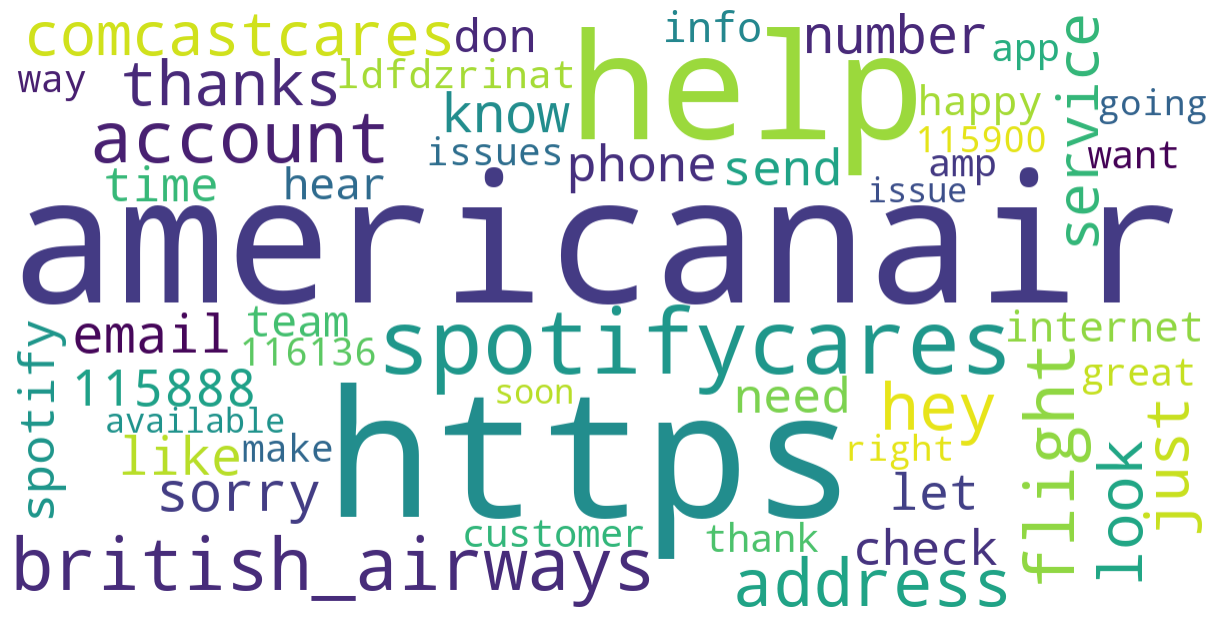

In [9]:
#stop_words = ['https'] + companies
corpora['CS'].viz.wordcloud()

#### Create a subcorpus by randomly sampling the corpus, then display wordcloud out of that sub-corpus

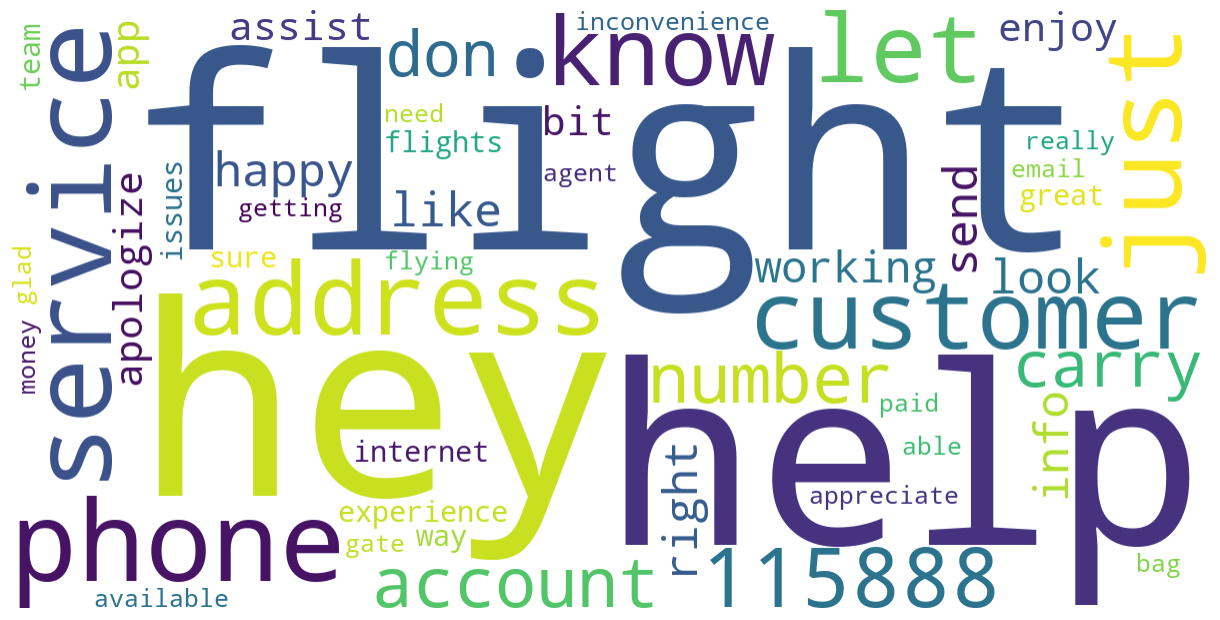

In [10]:
stop_words = ['https'] + companies
subcorpus = corpora['CS'].sample(100)
subcorpus.summary()
subcorpus.viz.wordcloud(stopwords = stop_words)

### **Concordance Tool**

### Use the [ATAP Concordance Tool](https://github.com/Australian-Text-Analytics-Platform/atap_widgets/tree/main) to check some corpus the contents and search for the contexts.
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>ATAP Concordance Tool</b> 
The ATAP Concordance Tool is a widget developed by the Sydney Informatics Hub under the ATAP project so that the user could interactively search keyword and display the contexts around the keywords within a jupyter notebook. The widget can be used independently if needed.
</div>
<div class="alert alert-block alert-danger" style="font-size:16px;">
<b>Warning</b> 
The ATAP Concordance Tool is not designed to be used on large corpus. Make sure you do not input a large corpus to avoid long loading time. For this twitter dataset, it can process roughly 80 tweets per second, i.e. a corpus with 1000 tweets will take ~13 seconds to load and display.
</div>

In [11]:
import time
st = time.time()
conc = ConcordanceLoader(type='corpus', df_input = subcorpus)
conc.show()
print(time.time() - st, 'seconds')

1.35164213180542 seconds


### **Timeline**
### With datetime metadata in this corpus, we can plot some timelines to view the historical activities.

In [13]:
corpora['CS'].viz.timeline('created_at', freq='1D')
# corpora['CS'].viz.timeline('created_at', freq='1D', meta_name='conversation')

## 1.4 Build a corpus with code
<div class="alert alert-block alert-info" style="font-size:16px;">
<b>Using the Code or Widget</b>
    
The Juxtorpus is a python package developed to work without notebook, thus all operations can be done through python functions in code.

On the other hand, some widgets are developed as additional interactive components specifically for work on notebooks, with a purpose to make some common tasks easier for people with less coding skills. The widgets may not cover all the functions available in Juxtorpus, and sometimes it's easier to modify and repeat task in a chunk of code.
</div>

### The following is an example to build a corpus from a pre-exist CSV file

<div class="alert alert-block alert-warning" style="font-size:16px;">
    
In order to build your corpus with codes, you need to know the structure of your data, e.g. file path, file type, headers, data types of all metadata, and some understanding about the [Pandas](https://pandas.pydata.org) Dataframe.
</div>


In [14]:
use_cols = ['id', 'created_at', 'source', 'location', 'text', 'retweet_count', 'lang', 'possibly_sensitive', 'tweet_type']
dtypes = {'id': 'Int64', 
        'source': 'category', 
        'location':str, 'text':str, 
        'retweet_count':int, 
        'lang': 'category', 
        'tweet_type': 'category'}

df = pd.read_csv(Path('./notebooks/demos/Sample_Auspol_Tweets_Full.csv'), 
                 usecols=use_cols, 
                 dtype=dtypes)
df['created_at'] = pd.to_datetime(df['created_at'])
corpus = Corpus.from_dataframe(df, col_doc='text', name='auspol')

corpora.add(corpus)
corpus.name


'auspol'

In [20]:
# # The Customer Service Corpus can be built with the following code.
# corpora = Corpora()
# use_cols = ['author_id', 'inbound', 'created_at', 'text', 'in_response_to_tweet_id', 'company', 'conversation']
# # dtypes = ['Int64', 'category', 'string', 'string', 'Int64', 'Int64', 'category', 'category']

# df = pd.read_csv(Path('./notebooks/demos/taster_workshop/twcs_sel.csv'),
#                  usecols=use_cols, 
#                  dtype={'author_id': str,
#                         'inbound': 'category',
#                         'created_at': str,
#                         'text':str,
#                         'in_response_tweet_id': 'Int64',
#                         'company': 'category', 
#                         'conversation': 'category'})

# df['created_at'] = pd.to_datetime(df['created_at'])
# # #corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
# corpus = Corpus.from_dataframe(df, col_doc='text', name='CS')
# corpora.add(corpus)

[INFO] CS already exists. It renamed to CS_


# 2. Corpus Slicing
<div class="alert alert-block alert-info" style="font-size:16px;">
    
A slicing operation can be done through the corpora.widget().  
When a corpus is selected in the widget, the slicer pane expands and the corpus can be sliced based on the metadata. 
    
The slicing operations vary according to different data types of the used metadata, and the user can add and combine different operations for slicing a corpus.  
Within the widget, the size of new sub-corpus is displayed for the user's information.
</div>

## 2.1 Slicing with the widget

In [16]:
corpora.widget()

## 2.2 Slicing with codes
<div class="alert alert-block alert-info" style="font-size:16px;">
    
Depending on the data type of meta data, several functions can be used to slice your corpus. The user can call the slicer functions **corpus.slicer.filter_by_xxx()** with appropriate arguments, e.g.  
Categorical metadata: use _corpus.slicer.filter_by_item()_  
Datetime metadata: use _corpus.slicer.filter_by_datetime()_  
Numeric metadata: use corpus.slicer.filter_by_range()_  
Text metadata: use _corpus.slicer.filter_by_regex()_   
And for more general and complex situtation, the user can define the slicing criteria and use _corpus.slicer.filter_by_condition()_ function.  
For more information, refer to the [Juxtorpus documentations]() (_under development_).
</div>

### In the following cell, we create four sub-corpora that consist of _inbound_ messages (from the customers) to each of the four companies, _AmericanAir_, _British_Airway_, _ComCast (telecommunication)_ and _Spotify_).  
### Each of these sub-corpora are added into the corpora, and can be sliced further within the widget.

In [7]:
temp = corpora['CS'].slicer.filter_by_item('inbound', 'True')
temp.rename('Customer')
AA_C = temp.slicer.filter_by_item('company', 'americanair')
AA_C.rename('AA_C')
BA_C = temp.slicer.filter_by_item('company', 'british_airways')
BA_C.rename('BA_C')
CC_C = temp.slicer.filter_by_item('company', 'comcastcares')
CC_C.rename('CC_C')
SP_C = temp.slicer.filter_by_item('company', 'spotifycares')
SP_C.rename('SP_C')
corpora.add([AA_C, BA_C, CC_C, SP_C])
corpora.items()

['CS', 'AA_C', 'BA_C', 'CC_C', 'SP_C']

In [ ]:
happy_customer = temp.slicer.filter_by_regex('document', r'thank', ignore_case=True)

<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>

## What is a sub-corpus
</b>
    
Each sub-corpus has a parent-corpus which indicates from which corpus the current corpus is sliced from, however a sub-corpus is still a corpus covering a sub-set documents of the original corpus, and everything works with a corpus can be done on a sub-corpus. 
A sub-corpus can be explored with the exact same functions and visualisations, e.g. the new _Frequency table_, _Word cloud_, _Timeline_ or _Summary_ will just be generated based on what's in the sub-corpus, so that you can understand how different each sub-corpus is.
</div>

## 2.3 Explore and compare the (sub-)corpora

### **Timelines** for comparing multiple corpora

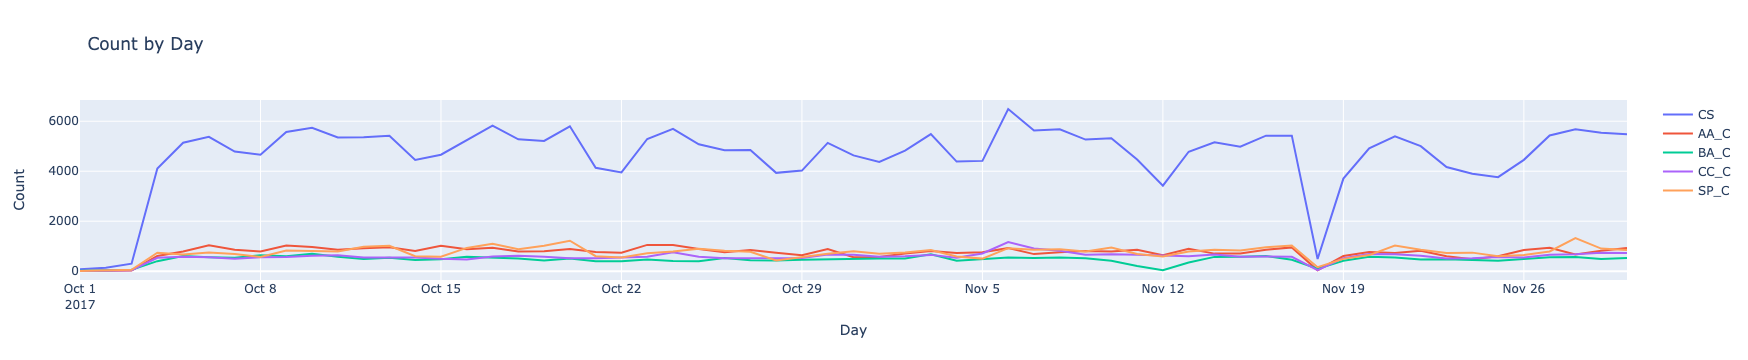

In [20]:
corpora.viz.timelines(['CS', 'AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D')
# corpora.viz.timelines(['CS', 'AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D', meta_name='conversation')
# corpora.viz.timelines(['CS', 'AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1W', meta_name='author_id')

### **WordCloud** and additional options for the wordcloud creation

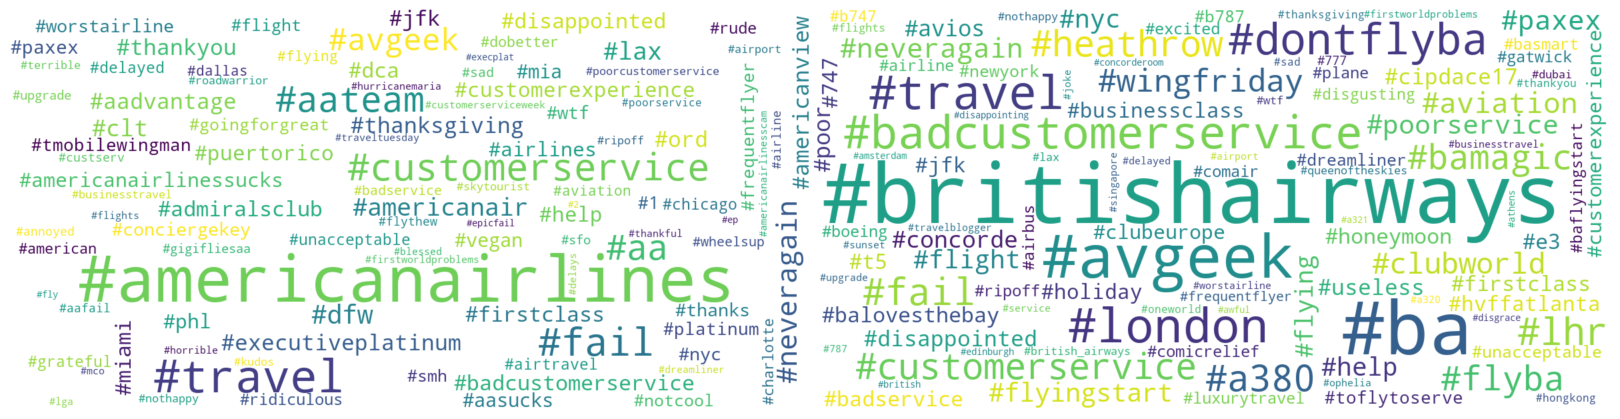

In [21]:
# Wordcloud for multiple corpora 
MAXWORD = 100
TYPE = 'hashtag' # 'word', 'hashtag', 'mention'
METRIC = 'tf' # 'tf', 'tfidf'
EXCLUSION = ['https'] + companies

corpora.viz.wordclouds(['AA_C', 'BA_C'], metric=METRIC, max_words=100, word_type=TYPE, stopwords=EXCLUSION, lower=True)

### **Interactive Timeline**

In [31]:
COL_TIME = 'created_at'
FREQ = '1w'
NAME = 'BA_C'

nlp = spacy.blank('en') #spacy.load('en_core_web_sm')
corpus = process(corpora[NAME], nlp=nlp)

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]

corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, use_custom_dtm=True)
item_timeline.widget()

Spacy Corpus:   0%|          | 0/28144 [00:00<?, ?it/s]

[INFO] BA_C already exists. It renamed to BA_C_
[INFO] BA_C_ already exists. It renamed to BA_C__
[INFO] BA_C__ already exists. It renamed to BA_C___
[INFO] BA_C___ already exists. It renamed to BA_C____
[INFO] BA_C____ already exists. It renamed to BA_C_____


Extract all Hashtags and display their weekly trends
 - Click legend to deselect items
 - Use the search box to display specific hashtag


FigureWidget({
    'data': [{'marker': {'color': 'rgba(76,238,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#britishairways',
              'text': [, , , , , , , , , 244.0],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': '77911127-c0a3-41d6-a4a1-d1ce24627521',
              'x': [2017-10-01 00:00:00, 2017-10-08 00:00:00, 2017-10-15 00:00:00,
                    2017-10-22 00:00:00, 2017-10-29 00:00:00, 2017-11-05 00:00:00,
                    2017-11-12 00:00:00, 2017-11-19 00:00:00, 2017-11-26 00:00:00,
                    2017-12-03 00:00:00],
              'y': array([ 0., 20., 34., 23., 16., 17., 27., 31., 58., 18.])},
             {'marker': {'color': 'rgba(128,32,32,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#ba',
              'text': [, , , , , , , , , 186.0],
              'textfont': {'color': 'crimson'},
       

# 3 Jux<span style="font-size:18px;">tapose</span> a pair of corpus
<div class="alert alert-block alert-info" style="font-size:16px;">
    
The **Jux** is a python package specially developed to work with the **Corpus** package with a focus on comparing and constrasting to highlight the differences between two corpora on the token/word level.  
The idea of **Jux** is to highlight the _features_ of corpus by eliminating the common words that are used in a similar way in both corpora.  
Several metrics have been implemented for measuring the word usage similarity, including term frequency, tfidf, and [Loglikelihood]().
</div>

### As a comparison, what does a wordcloud tell us?

## 3.1 Keyword Analysis

In [11]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

CNAME1 = 'AA_C'
CNAME2 = 'BA_C'
TopN = 30

FreqTable1 = corpora[CNAME1].dtm.freq_table().series.rename(CNAME1)
FreqTable2 = corpora[CNAME2].dtm.freq_table().series.rename(CNAME2)
FT_df = pd.concat([FreqTable1, FreqTable2], axis=1, join='outer').fillna(0)
colour = FT_df[CNAME1] > FT_df[CNAME2]

jux = Jux(corpora[CNAME1], corpora[CNAME2])
print('Blue: Corpus {}; Red: Corpus {}'.format(CNAME1, CNAME2))

llv = jux.stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:TopN].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)


Blue: Corpus AA_C; Red: Corpus BA_C


In [12]:
MAXWORD = 100
METRIC = 'log_likelihood' # 'tf', 'tfidf', 'log_likelihood'

jux_C = Jux(corpora[CNAME1], corpora[CNAME2])

jux_C.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)  # change this to 'tfidf' or 'log_likelihood'

NameError: name 'companies' is not defined

In [13]:
temp = corpora['CS'].slicer.filter_by_item('inbound', 'False')
temp.rename('Service')
AA_S = temp.slicer.filter_by_item('company', 'americanair')
AA_S.rename('AA_S')
BA_S = temp.slicer.filter_by_item('company', 'british_airways')
BA_S.rename('BA_S')

jux_S = Jux(AA_S, BA_S)

jux_S.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)

[INFO] Service already exists. It renamed to Service_
[INFO] Service_ already exists. It renamed to Service__
[INFO] AA_S already exists. It renamed to AA_S_
[INFO] AA_S_ already exists. It renamed to AA_S__
[INFO] BA_S already exists. It renamed to BA_S_
[INFO] BA_S_ already exists. It renamed to BA_S__


NameError: name 'companies' is not defined

# 4. Additional Text Analysis and advanced slicing options
<span  style="font-size:16px;">

The power of Juxtorpus lies in comparing and contrasting corpora that are specifically defined and sliced. There are only so many ways to slice the data based on existing metadata, which can be done equivalently in your Excel spreadsheet. However, in this section, we will demonstrate how to run various text analysis tools on the corpus, which enables the user to slice the corpus differently with more meaningful ways.
</span>

## 4.1 Sentiment Analysis

In [14]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('extract_hashtags')
nlp.add_pipe('extract_mentions')
nlp.add_pipe('spacytextblob')

scorpus = process(corpora['CC_C'].sample(200), nlp=nlp)
scorpus.summary()

Spacy Corpus:   0%|          | 0/200 [00:00<?, ?it/s]

[INFO] gigantic-boar already exists. It renamed to gigantic-boar_


Name                                                                                                                                                                                                         gigantic-boar_
Parent                                                                                                                                                                                                                 CC_C
Corpus Type                                                                                                                                                                                                     SpacyCorpus
Number of Documents                                                                                                                                                                                                     200
Number of Total Words                                                                                                                                                                                                  2973
Size of Vocabulary                                                                                                                                                                                                     1076
mean Words per Document                                                                                                                                                                                                  14
min Words per Document                                                                                                                                                                                                    1
max Words per Document                                                                                                                                                                                                   44
metas                    author_id, inbound, created_at, in_response_to_tweet_id, company, conversation, .sents, ._.hashtags, .tensor, .ents, ._.mentions, ._.blob, ._.polarity, sentiment, ._.subjectivity, ._.assessments

In [16]:
corpora.add(scorpus)
corpora.widget()

In [18]:
corpora['Negative'].docs().head(4)

1768                                                                                                                         (@115900, .., terrible, .., worst, service, ever)
4586      (Dear, @115900, I, am, convinced, you, guys, either, have, morons, working, for, you, ., That, ,, or, your, training, department, needs, some, immediate, revamp, !)
12131    (@ComcastCares, #, mobile_CareXI, my, connection, is, extremely, poor, but, you, are, showing, no, outages, !, I, have, to, work, soon, !, This, keeps, happening, !)
21426                                                                              (I, ’m, sick, and, tired, of, @115900, raggedy, ass, WiFi, outages, every, fucking, day, !)
Name: document, dtype: object

## Conversations with at least one happy tweet, then check on what the CS said vs those negative conversations.

In [38]:
from quotation_tool.extract_display_quotes import QuotationTool

ModuleNotFoundError: No module named 'quotation_tool'

In [ ]:
corpus.to_scorpus(inplace=True)
corpus = corpus.to_pcorpus(inplance=False)



from juxtorpus import analyse
tmNo= 5
lda = analyse(corpus, func='topic_model', model='lda', topic_no='10', add_to_corpus=True)
    remove_meta('TM_*')
    add_meta('TM_*')
        
sentiment = analyse(corpus, func='sentiment', model='text_blob', add_to_corpus=True)

sentiment.widget()
    sentiment.hist()

qt = analyse(corpus, function='quotation', model='gender_gap_tracker', add_to_corpus=True)
corpus._df = 

process(corpus, nlp=nlp)
    corpus._df = corpus._df.apply(lambda t: nlp(t))
    corpus.type = 'scorpus'
    
process(corpus, nlp=nlp.add_pipe('qt'))
    corpus._df = corpus._df.apply(lambda t: nlp(t))
    corpus.type = 'scorpus'
    quote_df = extract_quote(corpus._df)
    
process(corpus, nlp=nlp.add_pipe('pymusa'))
    corpus._df = corpus._df.apply(lambda t: nlp(t))
    corpus.type = 'scorpus'

# lda.add_results_to_corpus()

corpus = analyse(corpus, func='sem_tagger', model='pymusa', inplace=True)

## 4.2 Quotation Tool

In [ ]:
!pip install git+https://github.com/Australian-Text-Analytics-Platform/quotation-tool.git@75566b774fbe3248bd267964c8f5d632ea84f7ca

In [28]:
# Load a News Corpus for Quotation Tool.
use_cols = ['text', 'text_name', 'author', 'date', 'source']

df = pd.read_excel(Path('./notebooks/demos/taster_workshop/news.xlsx'),
                 usecols=use_cols)

df['date'] = pd.to_datetime(df['date'])
corpus = Corpus.from_dataframe(df, col_doc='text', name='News')
corpora.add(corpus)

[INFO] News already exists. It renamed to News_


In [29]:
corpora.widget()


In [30]:
qt = QuotationTool.from_corpus(corpora['News'], doc_name_meta_id='text_name')

Loading spaCy language model...
This may take a while...
Finished loading.


In [32]:
# specify the named entities you wish to include below
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']

# specify the number of rows you wish to display
n=5

# extract quotes from the text and preview them in a pandas dataframe (table) format
quotes_df = qt.get_quotes(inc_ent)

# display a preview of the pandas dataframe
qt_corpus = Corpus.from_dataframe(quotes_df, col_doc='quote', name='Quotation')
corpora.add(qt_corpus)

Extracting quotes...
This may take a while...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 13.64it/s]


In [36]:
quotes_df.columns
inc_col = ['text_id', 'text_name', 'quote_id', 'quote', 'quote_entities', 'speaker', 'speaker_entities', 'verb', 'quote_type', 'is_floating_quote']


Index(['text_id', 'text_name', 'quote_id', 'quote', 'quote_index',
       'quote_entities', 'speaker', 'speaker_index', 'speaker_entities',
       'verb', 'verb_index', 'quote_token_count', 'quote_type',
       'is_floating_quote'],
      dtype='object')

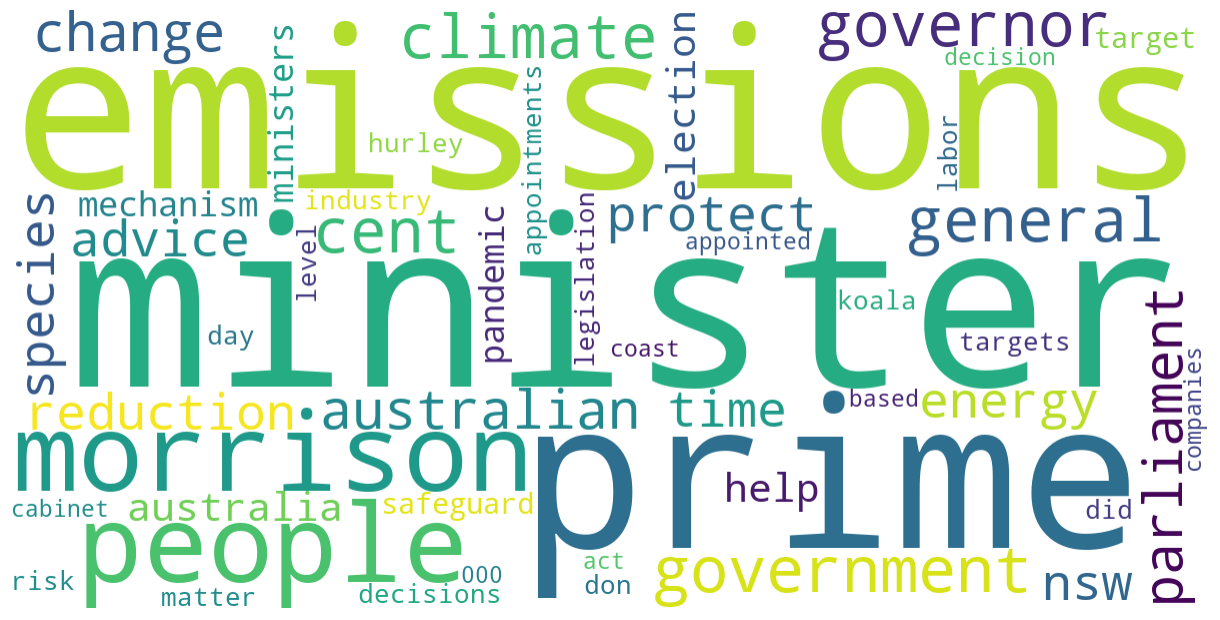

In [37]:
corpora['Quotation'].viz.wordcloud()

## 4.3 Topic Modelling

In [38]:
NUM_TOPICS = 5
lda = LDA(corpora['SP_C'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

TypeError: cannot create weak reference to 'NoneType' object

In [47]:
corpora.widget()

In [62]:
corpus = corpora['CC_C']
idx=corpus.to_dataframe().index
mapper = pd.Series(index=idx, data=list(range(len(corpus))))

req_idx = corpus.to_dataframe().sample(25).index
dtm_idx = mapper[req_idx]
dtm_idx

220661    27224
224562    27814
177590    20893
178394    20981
201815    24558
239089    29481
43812      5062
140046    15614
266985    32883
235515    29069
152116    17302
68400      7608
218560    27051
238902    29420
275666    33939
92173     10325
114981    12683
180266    21306
131292    14474
218950    27117
251790    30855
179548    21199
173492    20259
256756    31614
279362    34297
dtype: int64

## Matcher based content slicer + Regex

In [ ]:
# Give me all texts that contain at least 3 mentions of this word
from spacy.matcher import Matcher

word = 'opinion'
matcher = Matcher(scorpus.nlp.vocab)
matcher.add('has_word', patterns=[
    [{'ORTH': f'{word}'}]
])
scorpus_word = scorpus.slicer.filter_by_matcher(matcher, min_=1)
len(scorpus_word)

In [31]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

CName1 = 'AA_C'
CName2 = 'BA_C'

FreqTable1 = corpora[CName1].dtm.freq_table().series.rename(CName1)
FreqTable2 = corpora[CName2].dtm.freq_table().series.rename(CName2)

In [32]:
FreqTable1 - FreqTable2

000            92.0
0000            NaN
0002            NaN
000207          NaN
00040190834     NaN
               ... 
パンダ             NaN
竟然顺利登机          NaN
言語の変更           NaN
超高了预期           NaN
这是什么情况          NaN
Length: 53936, dtype: float64

In [4]:


nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('extract_hashtags')
nlp.add_pipe('extract_mentions')
nlp.add_pipe('spacytextblob')

scorpus = process(corpora['CC_C'].sample(200), nlp=nlp)
scorpus.summary()

Spacy Corpus:   0%|          | 0/200 [00:00<?, ?it/s]

Name                                                                                                                                                                                                          almond-trogon
Parent                                                                                                                                                                                                                 CC_C
Corpus Type                                                                                                                                                                                                     SpacyCorpus
Number of Documents                                                                                                                                                                                                     200
Number of Total Words                                                                                                                                                                                                   0.0
Size of Vocabulary                                                                                                                                                                                                        0
mean Words per Document                                                                                                                                                                                                   0
min Words per Document                                                                                                                                                                                                    0
max Words per Document                                                                                                                                                                                                    0
metas                    author_id, inbound, created_at, in_response_to_tweet_id, company, conversation, .sents, ._.mentions, .tensor, .ents, ._.hashtags, ._.blob, ._.polarity, sentiment, ._.subjectivity, ._.assessments

In [15]:
corpora['Positive'].summary()

Name                                                                                                                                                                                                               Positive
Parent                                                                                                                                                                                                    shapeless-bettong
Corpus Type                                                                                                                                                                                                     SpacyCorpus
Number of Documents                                                                                                                                                                                                       3
Number of Total Words                                                                                                                                                                                                   0.0
Size of Vocabulary                                                                                                                                                                                                        0
mean Words per Document                                                                                                                                                                                                   0
min Words per Document                                                                                                                                                                                                    0
max Words per Document                                                                                                                                                                                                    0
metas                    author_id, inbound, created_at, in_response_to_tweet_id, company, conversation, .ents, ._.hashtags, .tensor, .sents, ._.mentions, ._.blob, ._.polarity, sentiment, ._.subjectivity, ._.assessments

In [5]:
corpora.add(scorpus)

In [19]:
scorpus.meta['._.polarity'].head(5)

text  \
0                                                                                                                                             @comcastcares ✔   
1                                                         .@comcastcares tired of getting charged for equipment that was returned months ago. Please stop it.   
2                                                                                                                            @comcastcares Sent and thank you   
3                                                              @115900 hi I got some odd text alert from you I don't have your service why would I get alerts   
4  @comcastcares Phoenix Suns are on auto record. NBA Team Channel 752 trying to record tonight. I only want regular broadcast games recorded like TiVo does.   

   ._.polarity  
0     0.000000  
1    -0.400000  
2     0.000000  
3    -0.166667  
4     0.000000

In [5]:
from juxtorpus.corpus.corpus import _ALL_CORPUS_NAMES
_ALL_CORPUS_NAMES

{'AA_C', 'BA_C', 'CC_C', 'SP_C', 'orchid-salamander'}

safjdlsa


In [10]:
conc = ConcordanceLoader(type='corpus', df_input = corpora['Negative'])
conc.show()

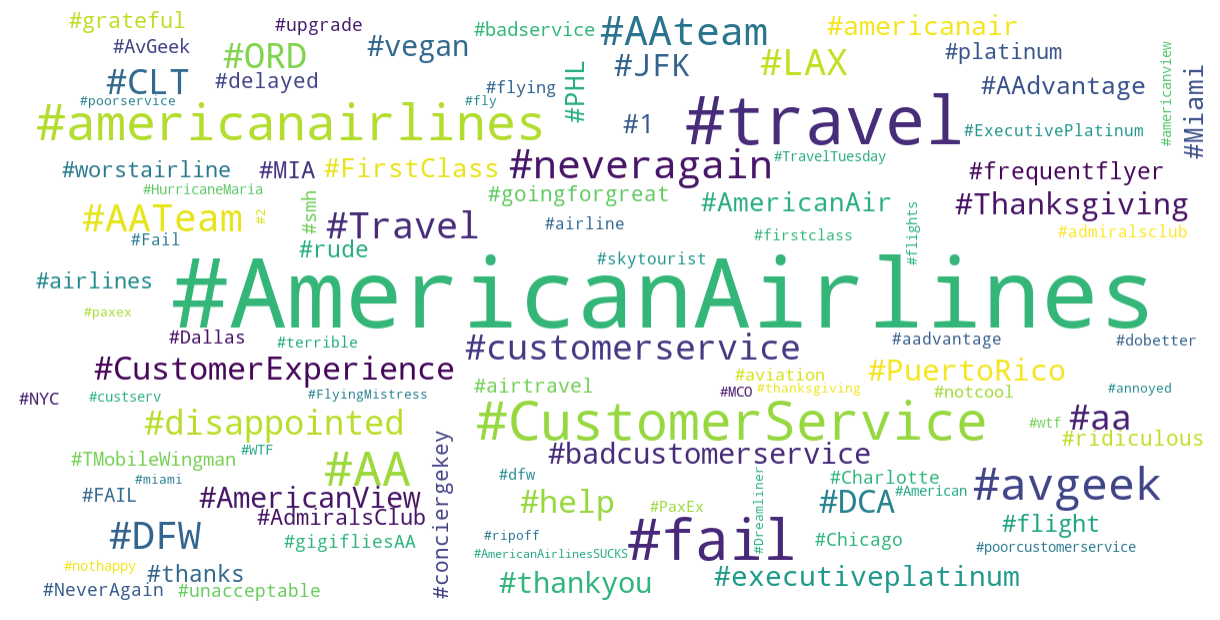

In [6]:
MAX_WORDS = 100
#TYPE = 'word'
TYPE = 'hashtag'
#TYPE = 'mention'
temp = corpora['AA_C'].detached()
temp.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

In [33]:
corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D', count='conversation')

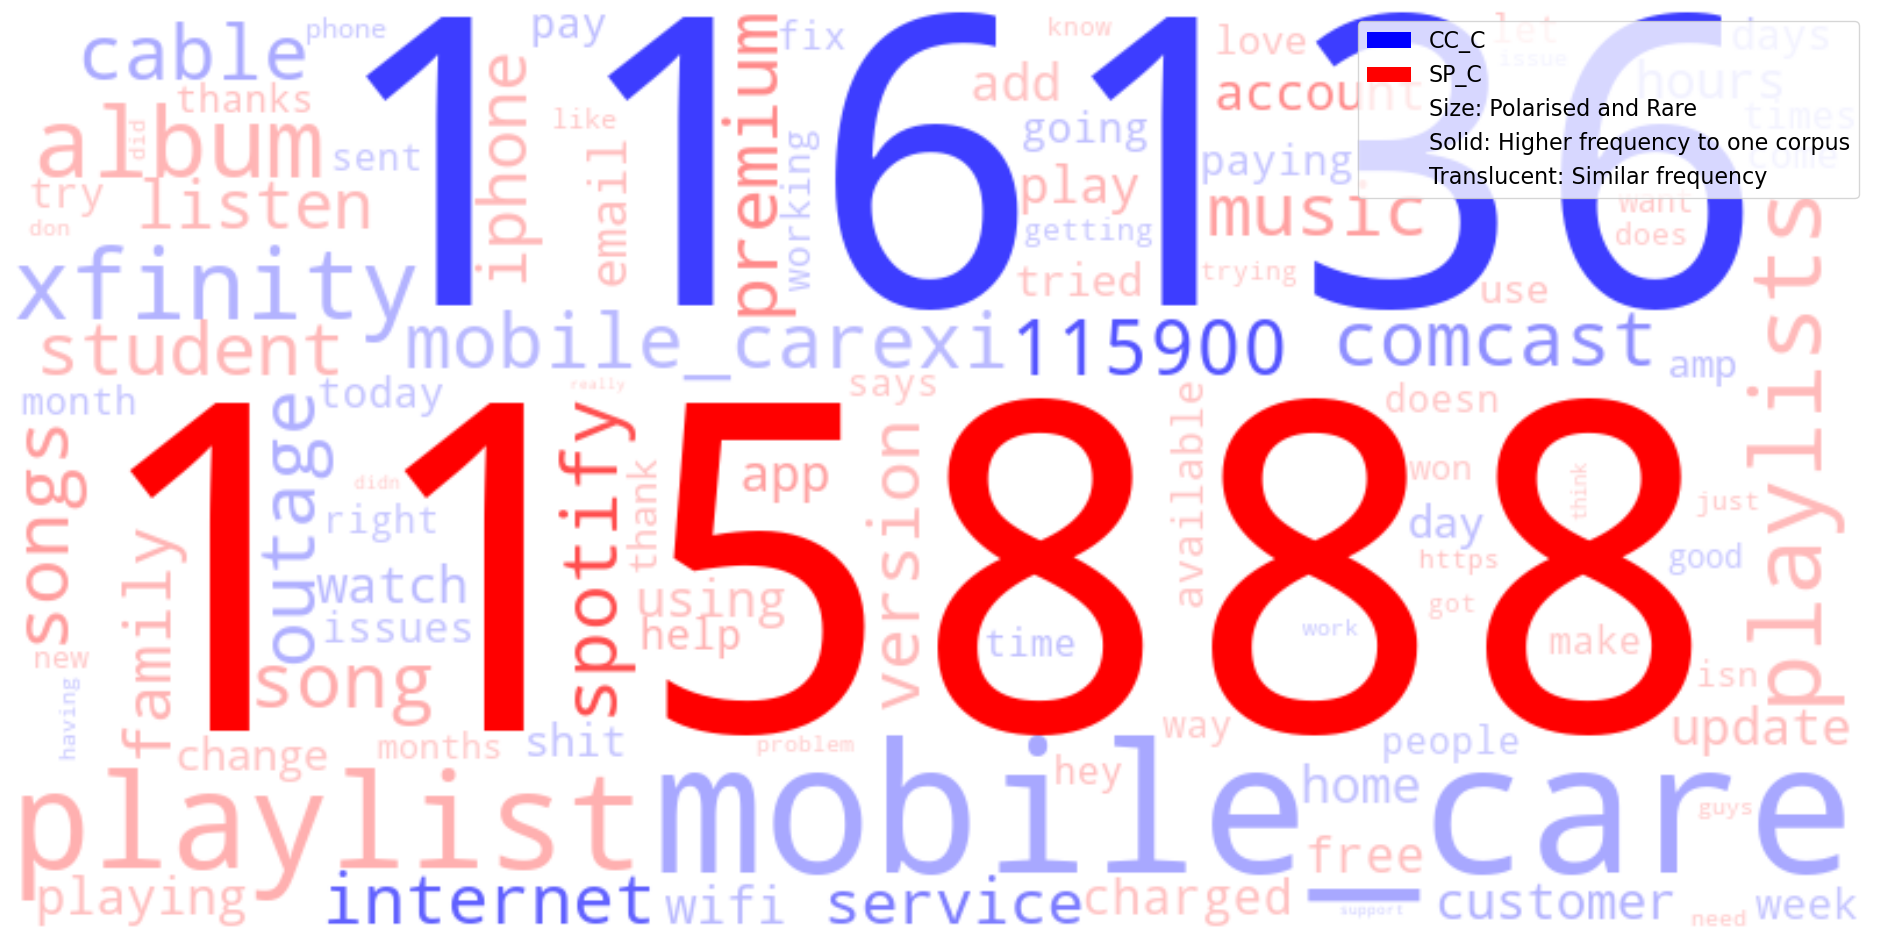

In [9]:
from juxtorpus import Jux

jux = Jux(corpora['CC_C'], corpora['SP_C'])
stop_words = ['comcastcares', 'spotifycares']
jux.polarity.wordcloud(metric='tf', top=100, colours=('blue', 'red'), stopwords=stop_words)  # change this to 'tfidf' or 'log_likelihood'

In [73]:
# What are the client complaining about
import numpy as np
temp = corpora['CC_C'].slicer.filter_by_item('author_id', '116136')
conv_ids = temp.meta['conversation'].series.values.unique().tolist()
customer = corpora['CS'].slicer.filter_by_item('conversation', conv_ids)

In [78]:
from collections import Counter
Counter(customer.meta['author_id'].series).most_common(10)

[('comcastcares', 209),
 ('116136', 181),
 ('197748', 16),
 ('583750', 12),
 ('146500', 6),
 ('167967', 6),
 ('755768', 6),
 ('211276', 5),
 ('299034', 5),
 ('460366', 5)]

In [79]:
# What are the client complaining about
conc = ConcordanceLoader(type='corpus', df_input = customer)
conc.show()

In [10]:
corpora.widget()

In [14]:
# Concordance on a sample of corpus.

from atap_widgets.concordance import ConcordanceLoader
sample_size = 50
conc = ConcordanceLoader(type='corpus', df_input = corpora['CC_C'].sample(sample_size))
conc.show()

In [15]:
CC_C.

'CC_C'

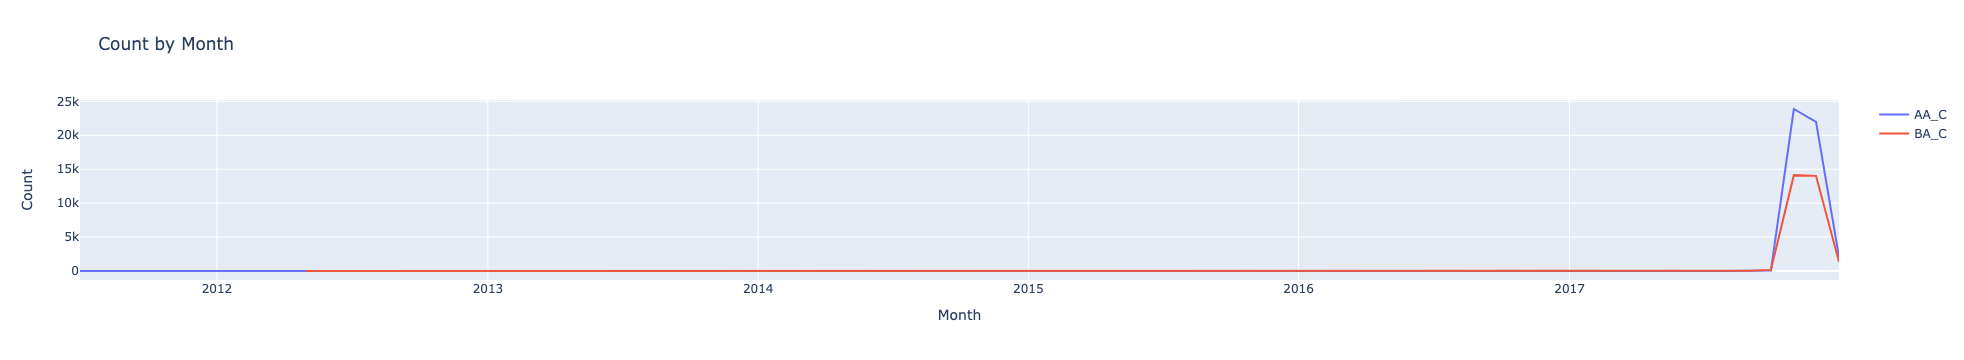

In [28]:
corpora.viz.timelines(['AA_C', 'BA_C'], 'created_at', freq='1m')

In [18]:
corpora['auspol'].slicer.filter_by_item('tweet_type', 'original')

In [8]:
df2 = corpus.to_dataframe()
df2.to_csv('./notebooks/demos/taster_workshop/twcs_sel2.csv')

In [13]:

corpora.widget()

In [11]:
from timeit import default_timer as timer

start = timer()

DataCSV = ConcordanceLoader(type='dataframe', df_input=df)
DataCSV.show()

end = timer()
print(end - start)

124.31303654203657


In [10]:
from timeit import default_timer as timer
#corpus = Corpus.from_dataframe(df, col_doc='text', name='auspol-plain')
start = timer()

DataCSV = ConcordanceLoader(type='corpus', df_input=corpora['test2'])
DataCSV.show()

end = timer()
print(end - start)

1.0160403330228291


In [ ]:
corpus.summary()

In [ ]:
# Alternatively, a corpus can be built with the code and added to the corpora container.
# corpora.add(corpus)   # alternatively


In [ ]:
df.columns

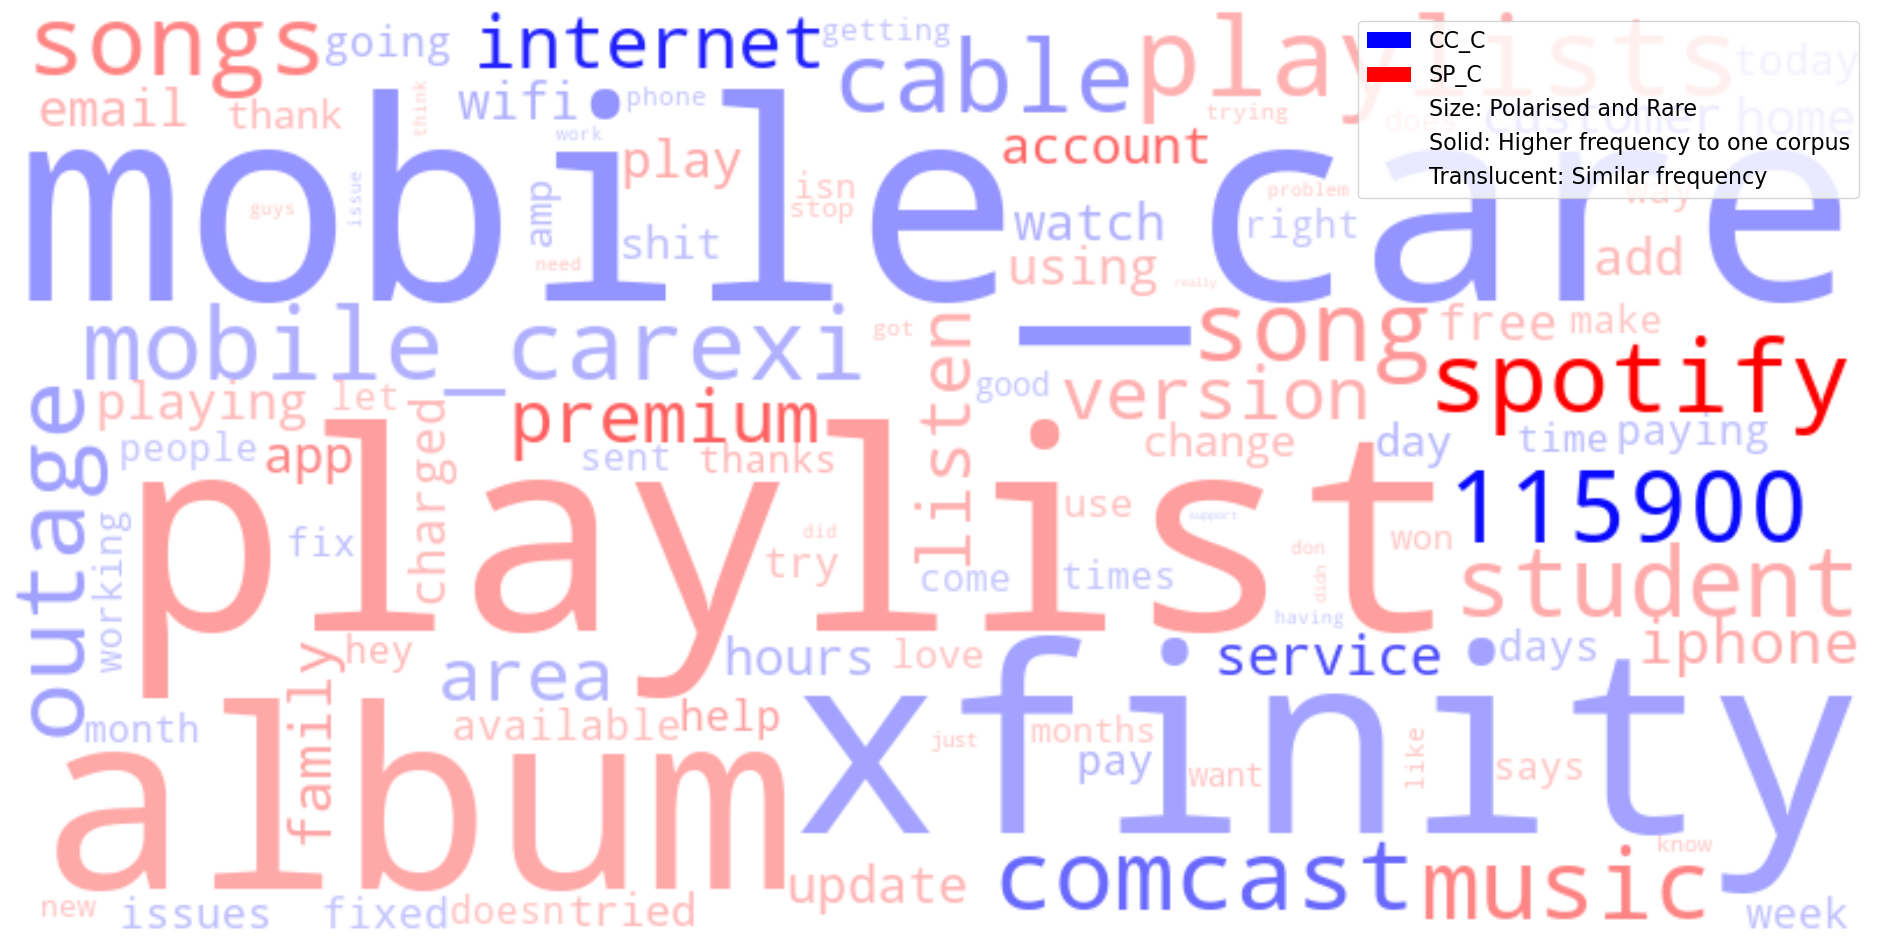

In [26]:
jux2 = Jux(corpora['CC_C'], corpora['SP_C'])
jux2.polarity.wordcloud(metric='tf', top=100, stopwords=EXCLUSION + ['116136', '115888'])

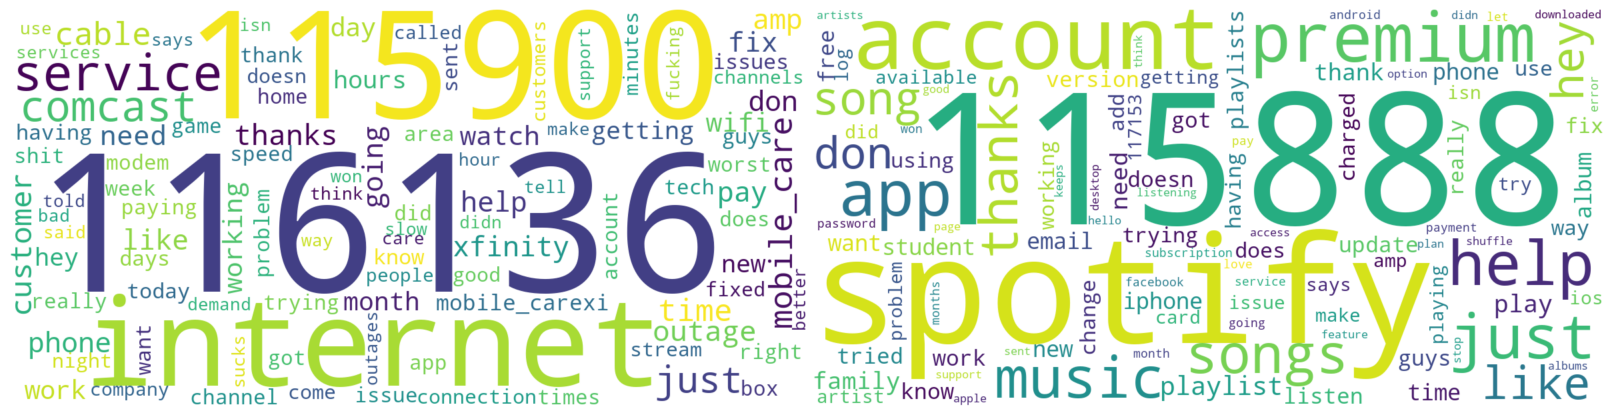

In [24]:
corpora.viz.wordclouds(['CC_C', 'SP_C'], metric=METRIC, max_words=100, word_type='word', stopwords=EXCLUSION)

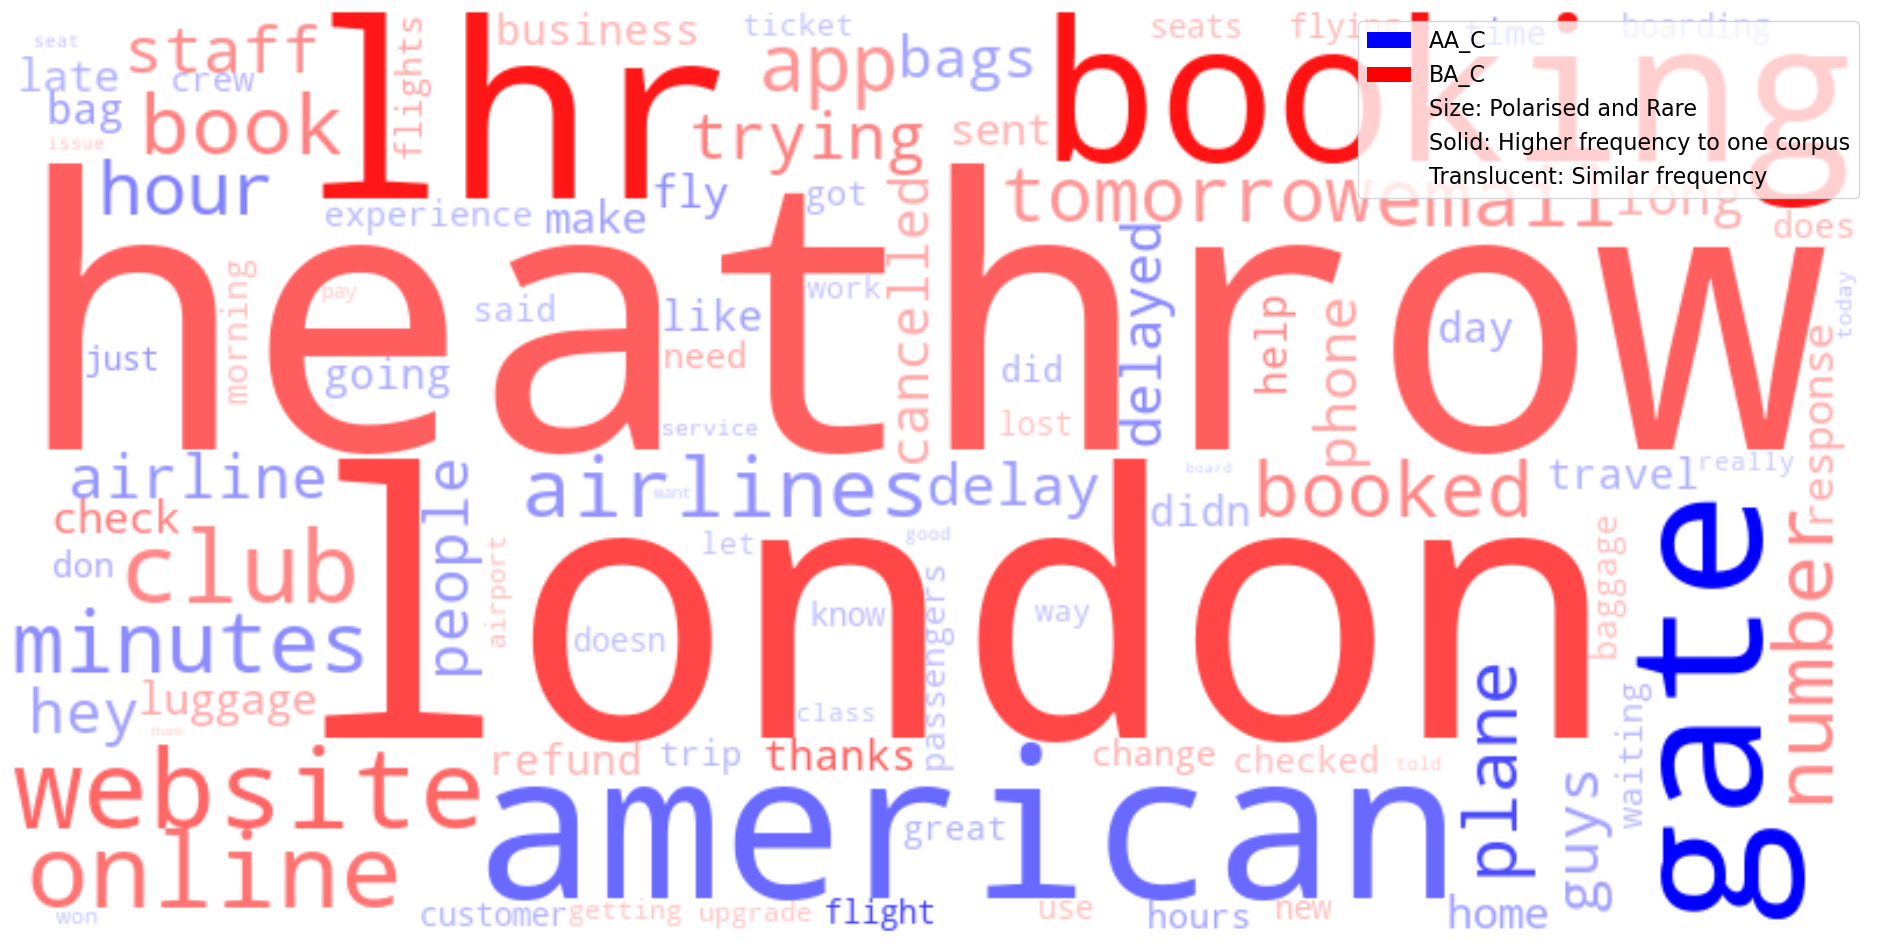

In [23]:
jux = Jux(corpora['AA_C'], corpora['BA_C'])
jux.polarity.wordcloud(metric='tf', top=100, stopwords=EXCLUSION)  # change this to 'tfidf' or 'log_likelihood'

In [21]:
corpora.viz.wordclouds(['AA_C', 'BA_C'], metric=METRIC, max_words=100, word_type='word', stopwords=EXCLUSION)

## Exploring the Corpus

In [ ]:
corpus = corpora['auspol']
print('This table summarise the basic information of the corpus')
corpus.summary()

### Corpus Wordcloud

In [ ]:
MAX_WORDS = 100
TYPE = 'word'
# TYPE = 'hashtag'
# TYPE = 'mention'
print('Generate a word cloud with one line of code')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

In [ ]:
MAX_WORDS = 100
# TYPE = 'word'
TYPE = 'hashtag'
# TYPE = 'mention'
print('Or make a wordcloud focusing on another predefined pattern - Hashtag')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

### A Timeline of Daily Tweets Number

In [ ]:
# FREQ = '1w'
# FREQ = '1m'
FREQ = '1d'
COL_TIME = 'created_at'
corpus.viz.timeline(COL_TIME, freq=FREQ)

In [ ]:
print('Can also aggregate the data by different periods, e.g. weekly tweeting numbers')
corpus.viz.timeline(COL_TIME, freq='1w')

In [ ]:
COL_TIME = 'created_at'
FREQ = '1w'

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]
corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, custom_dtm=True)
item_timeline.render()

# Corpus Slicer - creating a subcorpus

## Slice the corpus by categorical metadata - Single or Multiple Choices

In [ ]:
temp_corpus = corpora['auspol'].slicer.filter_by_item('lang', 'en')
temp_corpus.name = 'auspol-en'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_item('source', ['Twitter for iPad', 'Twitter for iPhone', 'Twitter for Mac'])
temp_corpus.name = 'Apple'
corpora.add(temp_corpus)

## Slice the corpus by time

In [ ]:
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/03/2022', end='01/06/2022')
temp_corpus.name = 'Autumn22'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/09/2021', end='01/12/2021')
temp_corpus.name = 'Spring21'
corpora.add(temp_corpus)

## Slice the corpus by conditions, customised functions or slice the sub-corpora


In [ ]:
import re
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('retweet_count', lambda cnt: cnt>3)
temp_corpus.name = 'rt5+'
corpora.add(temp_corpus)
#
L_func = '''lambda x: re.match(r'^.*android.*$', x, re.IGNORECASE) is not None'''
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('source', eval(L_func))
temp_corpus.name = 'Android'
corpora.add(temp_corpus)

## Interactive Widget for Slicing the Corpora

In [ ]:
corpora.widget()

# Text Analysis on Corpus

### All exploration can be easily repeated on sub-corpus, e.g. Wordcloud

In [ ]:
corpora['Autumn22'].viz.wordcloud(max_words=MAX_WORDS, word_type='word')

## LDA Topic Modelling + merge the outcome back to corpus

In [ ]:
NUM_TOPICS = 10
lda = LDA(corpora['Autumn22'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

### Create sub-corpus based on the topic model associations

In [ ]:
sel_topics = {'a': 4,
             'b': 10}
for t, n in sel_topics.items():
    temp_corpus = corpora['Autumn22'].slicer.filter_by_range('#lda_topic_{}'.format(n), min_=0.5)
    temp_corpus.name = 'Autumn_T'+t
    corpora.add(temp_corpus)

## Daily trends of the selected topics

In [ ]:
COL_TIME = 'created_at'
FREQ = '1d'
timelines(corpora, ['Autumn_Ta', 'Autumn_Tb'], COL_TIME, FREQ)

# Jux - Compare and highlight the contrasts between any pair of corpora

## Normal Corpus Wordcloud - Side by side, TFIDF

In [ ]:
MAX_WORDS = 50
# METRIC = 'tf'
METRIC = 'tfidf'
wordclouds(corpora, ['Autumn22', 'Spring21'], max_words=MAX_WORDS, metric=METRIC)

## Jux Polarity Wordcloud - term frequency

In [ ]:
METRIC = 'tf'
# METRIC = 'tfidf'
# METRIC = 'log_likelihood'
TOP = 80
jux_season = Jux(corpora['Autumn22'], corpora['Spring21'])
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'))

### User defined tokenising function

In [ ]:
METRIC = 'tf'

# getting hashtags using a user defined function
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'), tokeniser_func=extract_hashtags)

In [ ]:
colours = ('cyan', 'magenta')
jux_platform = Jux(corpora['Apple'], corpora['Android'])
jux_platform.polarity.wordcloud('tf', top=TOP, colours=colours)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)


Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
https://ucrel.lancs.ac.uk/llwizard.html

In [ ]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

jun_ft = corpora['Spring21'].dtm.freq_table().series
jan_ft = corpora['Autumn22'].dtm.freq_table().series
df_ft = pd.concat([jun_ft.rename('Spring21'), jan_ft.rename('Autumn22')], axis=1, join='outer').fillna(0)
colour = df_ft['Spring21'] > df_ft['Autumn22']

In [ ]:
llv = Jux(corpora['Spring21'], corpora['Autumn22']) \
    .stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:30].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

# Red - Overused in January Corpus, Blue - Overused in July Corpus

# Closing

+ Release is planned tentatively in **May**.
+ We will eventually integrate the ATAP tools together so you can easily access it under Corpus.
+ Stay tuned at https://www.atap.edu.au/
+ Feedback Survey at the end of the full workshop.
+ Questions - I'll be around or email me at huen.chan@sydney.edu.au